<a href="https://colab.research.google.com/github/Renan-Domingues/TensorFlow-Projects/blob/main/Celsius_to_fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A ideia deste projeto simples é desenvolver alguns conhecimentos usando a aprendizagem de maquina, transformando temperatura em Celsius para Fahrenheit**

In [1]:
import tensorflow as tf

In [2]:
# Criando dados em celsius
import random

random.seed(42)
celsius = [random.randint(1, 100) for i in range(50)]

celsius

[82,
 15,
 4,
 95,
 36,
 32,
 29,
 18,
 95,
 14,
 87,
 95,
 70,
 12,
 76,
 55,
 5,
 4,
 12,
 28,
 30,
 65,
 78,
 4,
 72,
 26,
 92,
 84,
 90,
 70,
 54,
 29,
 58,
 76,
 36,
 1,
 98,
 21,
 90,
 55,
 44,
 36,
 20,
 28,
 98,
 44,
 14,
 12,
 49,
 13]

In [3]:
# Transformando a lista em tensor
X = tf.convert_to_tensor(celsius, dtype=tf.float32)

print(X)

tf.Tensor(
[82. 15.  4. 95. 36. 32. 29. 18. 95. 14. 87. 95. 70. 12. 76. 55.  5.  4.
 12. 28. 30. 65. 78.  4. 72. 26. 92. 84. 90. 70. 54. 29. 58. 76. 36.  1.
 98. 21. 90. 55. 44. 36. 20. 28. 98. 44. 14. 12. 49. 13.], shape=(50,), dtype=float32)


In [4]:
# Fução para transformar C para F
def transform_temp(c):
  temp_f = (c * 9 / 5) + 32
  return temp_f

In [5]:
# Verificando se a função está correta
teste = transform_temp(15)
teste

59.0

In [6]:
# Transformando o X em label

y = [transform_temp(i) for i in X]

y

[<tf.Tensor: shape=(), dtype=float32, numpy=179.6>,
 <tf.Tensor: shape=(), dtype=float32, numpy=59.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=39.2>,
 <tf.Tensor: shape=(), dtype=float32, numpy=203.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=96.8>,
 <tf.Tensor: shape=(), dtype=float32, numpy=89.6>,
 <tf.Tensor: shape=(), dtype=float32, numpy=84.2>,
 <tf.Tensor: shape=(), dtype=float32, numpy=64.4>,
 <tf.Tensor: shape=(), dtype=float32, numpy=203.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=57.2>,
 <tf.Tensor: shape=(), dtype=float32, numpy=188.6>,
 <tf.Tensor: shape=(), dtype=float32, numpy=203.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=158.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=53.6>,
 <tf.Tensor: shape=(), dtype=float32, numpy=168.8>,
 <tf.Tensor: shape=(), dtype=float32, numpy=131.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=41.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=39.2>,
 <tf.Tensor: shape=(), dtype=float32, numpy=53.6>,
 <tf.Tensor: shape=(), 

In [7]:
#  separando treino e teste

data_split = int(len(X) * 0.8) # Pegando 80% dos dados para treinar

X_train = X[:data_split]
y_train = y[:data_split]

X_test = X[data_split:]
y_test = y[data_split:]

len(X_train), len(y_train), len(y_test), len(X_test)

(40, 40, 10, 10)

In [8]:
# Deixando os dados bidimensionais
X_train = tf.reshape(X_train, (-1, 1))
y_train = tf.reshape(y_train, (-1, 1))

In [25]:
# Criando o modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(1,), activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(50, activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(50, activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(20, activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='mse',
              metrics=['mse'])

# Treinar o model (fit the model)

history = model.fit(X_train, y_train, epochs=30)

Epoch 1/30
2/2 [==============================] - 2s 11ms/step - loss: 17486.6953 - mse: 17486.6953
Epoch 2/30
2/2 [==============================] - 0s 8ms/step - loss: 12791.3809 - mse: 12791.3809
Epoch 3/30
2/2 [==============================] - 0s 10ms/step - loss: 8464.5391 - mse: 8464.5391
Epoch 4/30
2/2 [==============================] - 0s 9ms/step - loss: 5294.5195 - mse: 5294.5195
Epoch 5/30
2/2 [==============================] - 0s 11ms/step - loss: 2437.8782 - mse: 2437.8782
Epoch 6/30
2/2 [==============================] - 0s 10ms/step - loss: 749.4097 - mse: 749.4097
Epoch 7/30
2/2 [==============================] - 0s 8ms/step - loss: 367.5453 - mse: 367.5453
Epoch 8/30
2/2 [==============================] - 0s 9ms/step - loss: 920.7610 - mse: 920.7610
Epoch 9/30
2/2 [==============================] - 0s 7ms/step - loss: 1520.1792 - mse: 1520.1792
Epoch 10/30
2/2 [==============================] - 0s 11ms/step - loss: 1401.6219 - mse: 1401.6219
Epoch 11/30
2/2 [=========

In [20]:
model.evaluate(X_train, y_train)

2/2 [==============================] - 1s 14ms/step - loss: 233.9606 - mae: 13.2082


[233.96060180664062, 13.208154678344727]

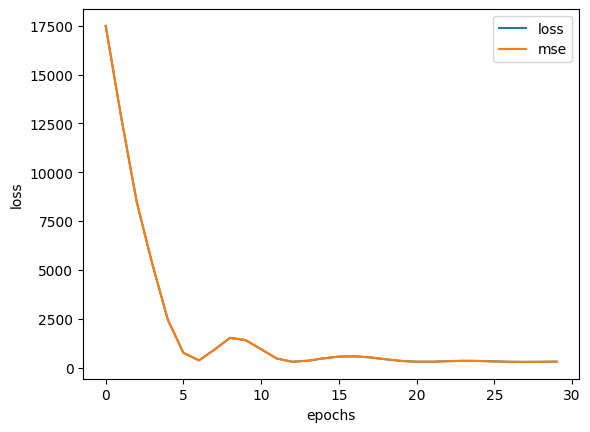

In [26]:
import matplotlib.pyplot as plt
import pandas as pd


# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [28]:
model.predict([[30]])

1/1 [==============================] - 0s 381ms/step


array([[65.75431]], dtype=float32)

O resultado não está preciso pois eu poderia ter diminuido mais o loss com a normalização dos meus dados, e mais alguns outros passos (como aumentar os epochs e diminuir o learning_rate)
